In [ ]:
# @auther:Hrushikesh

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string


In [12]:
df = pd.read_csv("Downloads/twitter/filename.csv")
df.shape

(10003, 36)

In [14]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [15]:
df = df[["username", "tweet", "language"]]

In [16]:
df.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [17]:
df["language"].value_counts()

en     8869
pt      461
it      156
in       97
qme      68
und      67
es       54
ru       31
ja       31
fr       23
zh       17
ca       16
tl       13
tr        9
hi        9
qht       9
de        9
nl        8
ur        8
fi        7
ar        6
qam       6
ro        4
pl        4
uk        4
et        3
th        3
cs        3
el        2
ht        2
ta        1
lt        1
vi        1
da        1
Name: language, dtype: int64

In [18]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\whize\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


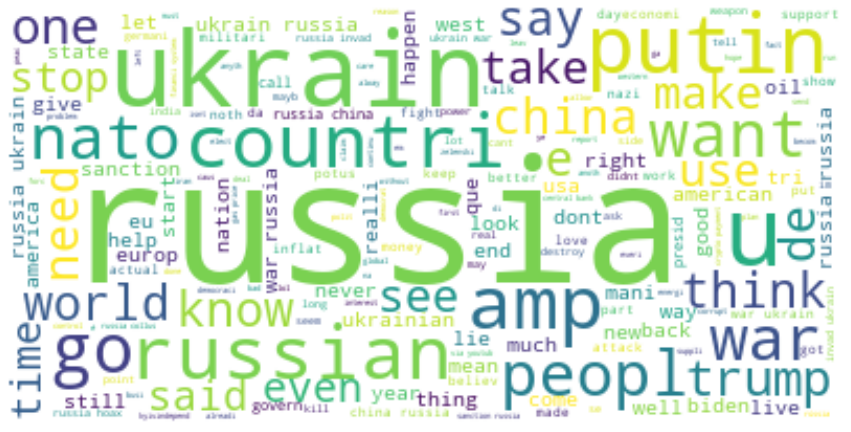

In [20]:
text = " ".join(i for i in df.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df = df[["tweet", "Positive", "Negative", "Neutral"]]
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\whize\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positive,Negative,Neutral
0,mayoisspicyy oh yes wait reloc russia there e...,0.252,0.000,0.748
1,botyconi cindylrbennett tuckercarlson russia ...,0.000,0.000,1.000
2,interpolusa jeanosisef equitysoul free choic ...,0.203,0.000,0.797
3,volodymyrdotcom kyivindepend china like attac...,0.251,0.144,0.605
4,pmalinauskasmp would upset putin invit come ru...,0.000,0.178,0.822


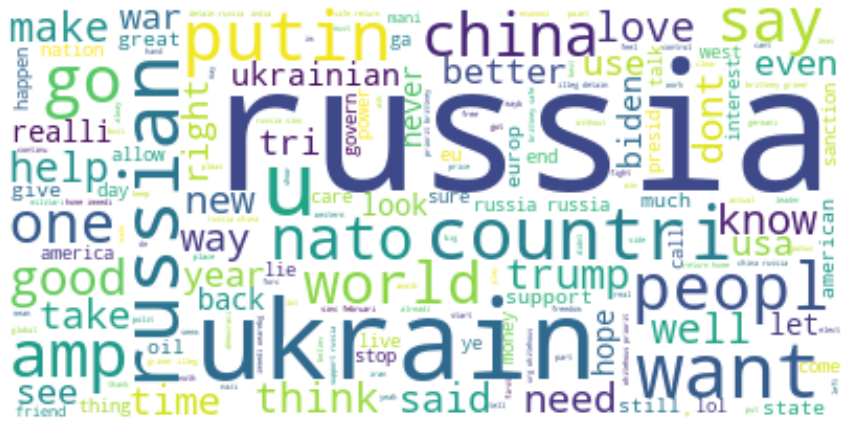

In [25]:
positive =' '.join([i for i in df['tweet'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

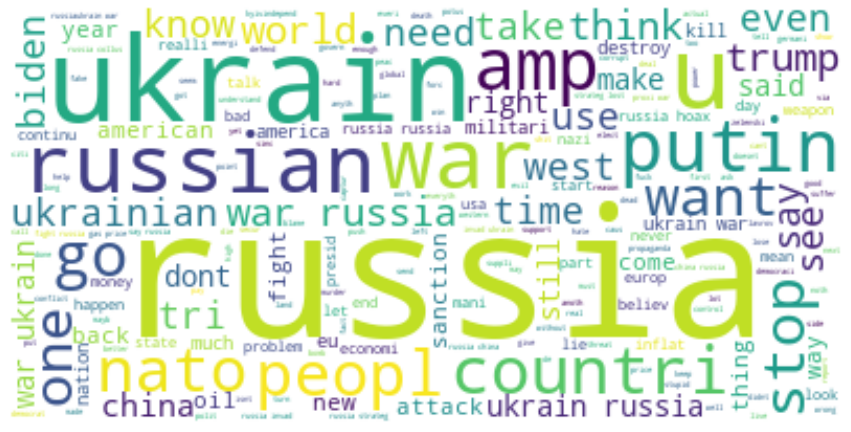

In [26]:
negative =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()